In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
# Load the CSV file
file_path = 'D:\\WeekThree\\data\\cleaned_file.csv'
df = pd.read_csv(file_path, low_memory=False)
total_rows, total_columns = df.shape
print(f"Total number of rows: {total_rows}")
print(f"Total number of columns: {total_columns}")
# Print the columns of the DataFrame
print(df.columns)

Total number of rows: 854137
Total number of columns: 51
Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'SumInsured', 'TermFrequency',
       'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory',
       'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass',
       'StatutoryRiskType', 'TotalPremium', 'TotalClaims', 'Bank_missing'],
      dtype='object')


In [21]:
# Calculate descriptive statistics
descriptive_stats = df.describe()
print("Descriptive Statistics:")
print(descriptive_stats)

# Variability for Totalpremium and Totalclaims Column
variability = df[['TotalPremium', 'TotalClaims']].var()
print(variability)
# Data Structure
print(df.dtypes)

Descriptive Statistics:
       UnderwrittenCoverID       PolicyID     PostalCode        mmcode  \
count        854137.000000  854137.000000  854137.000000  8.535850e+05   
mean         104221.126326    7893.972230    3067.435594  5.456773e+07   
std           63284.340184    5316.523614    2665.208637  1.398915e+07   
min               1.000000      14.000000       1.000000  4.042080e+06   
25%           54520.000000    4361.000000    1022.000000  6.005692e+07   
50%           94913.000000    7074.000000    2000.000000  6.005841e+07   
75%          138944.000000   11116.000000    4340.000000  6.005842e+07   
max          301133.000000   23241.000000    9870.000000  6.506535e+07   

       RegistrationYear      Cylinders  cubiccapacity      kilowatts  \
count     854137.000000  854137.000000  853585.000000  853585.000000   
mean        2009.971303       4.048633    2450.755760      96.617896   
std            3.313990       0.302771     461.377134      19.717568   
min         1994.0000

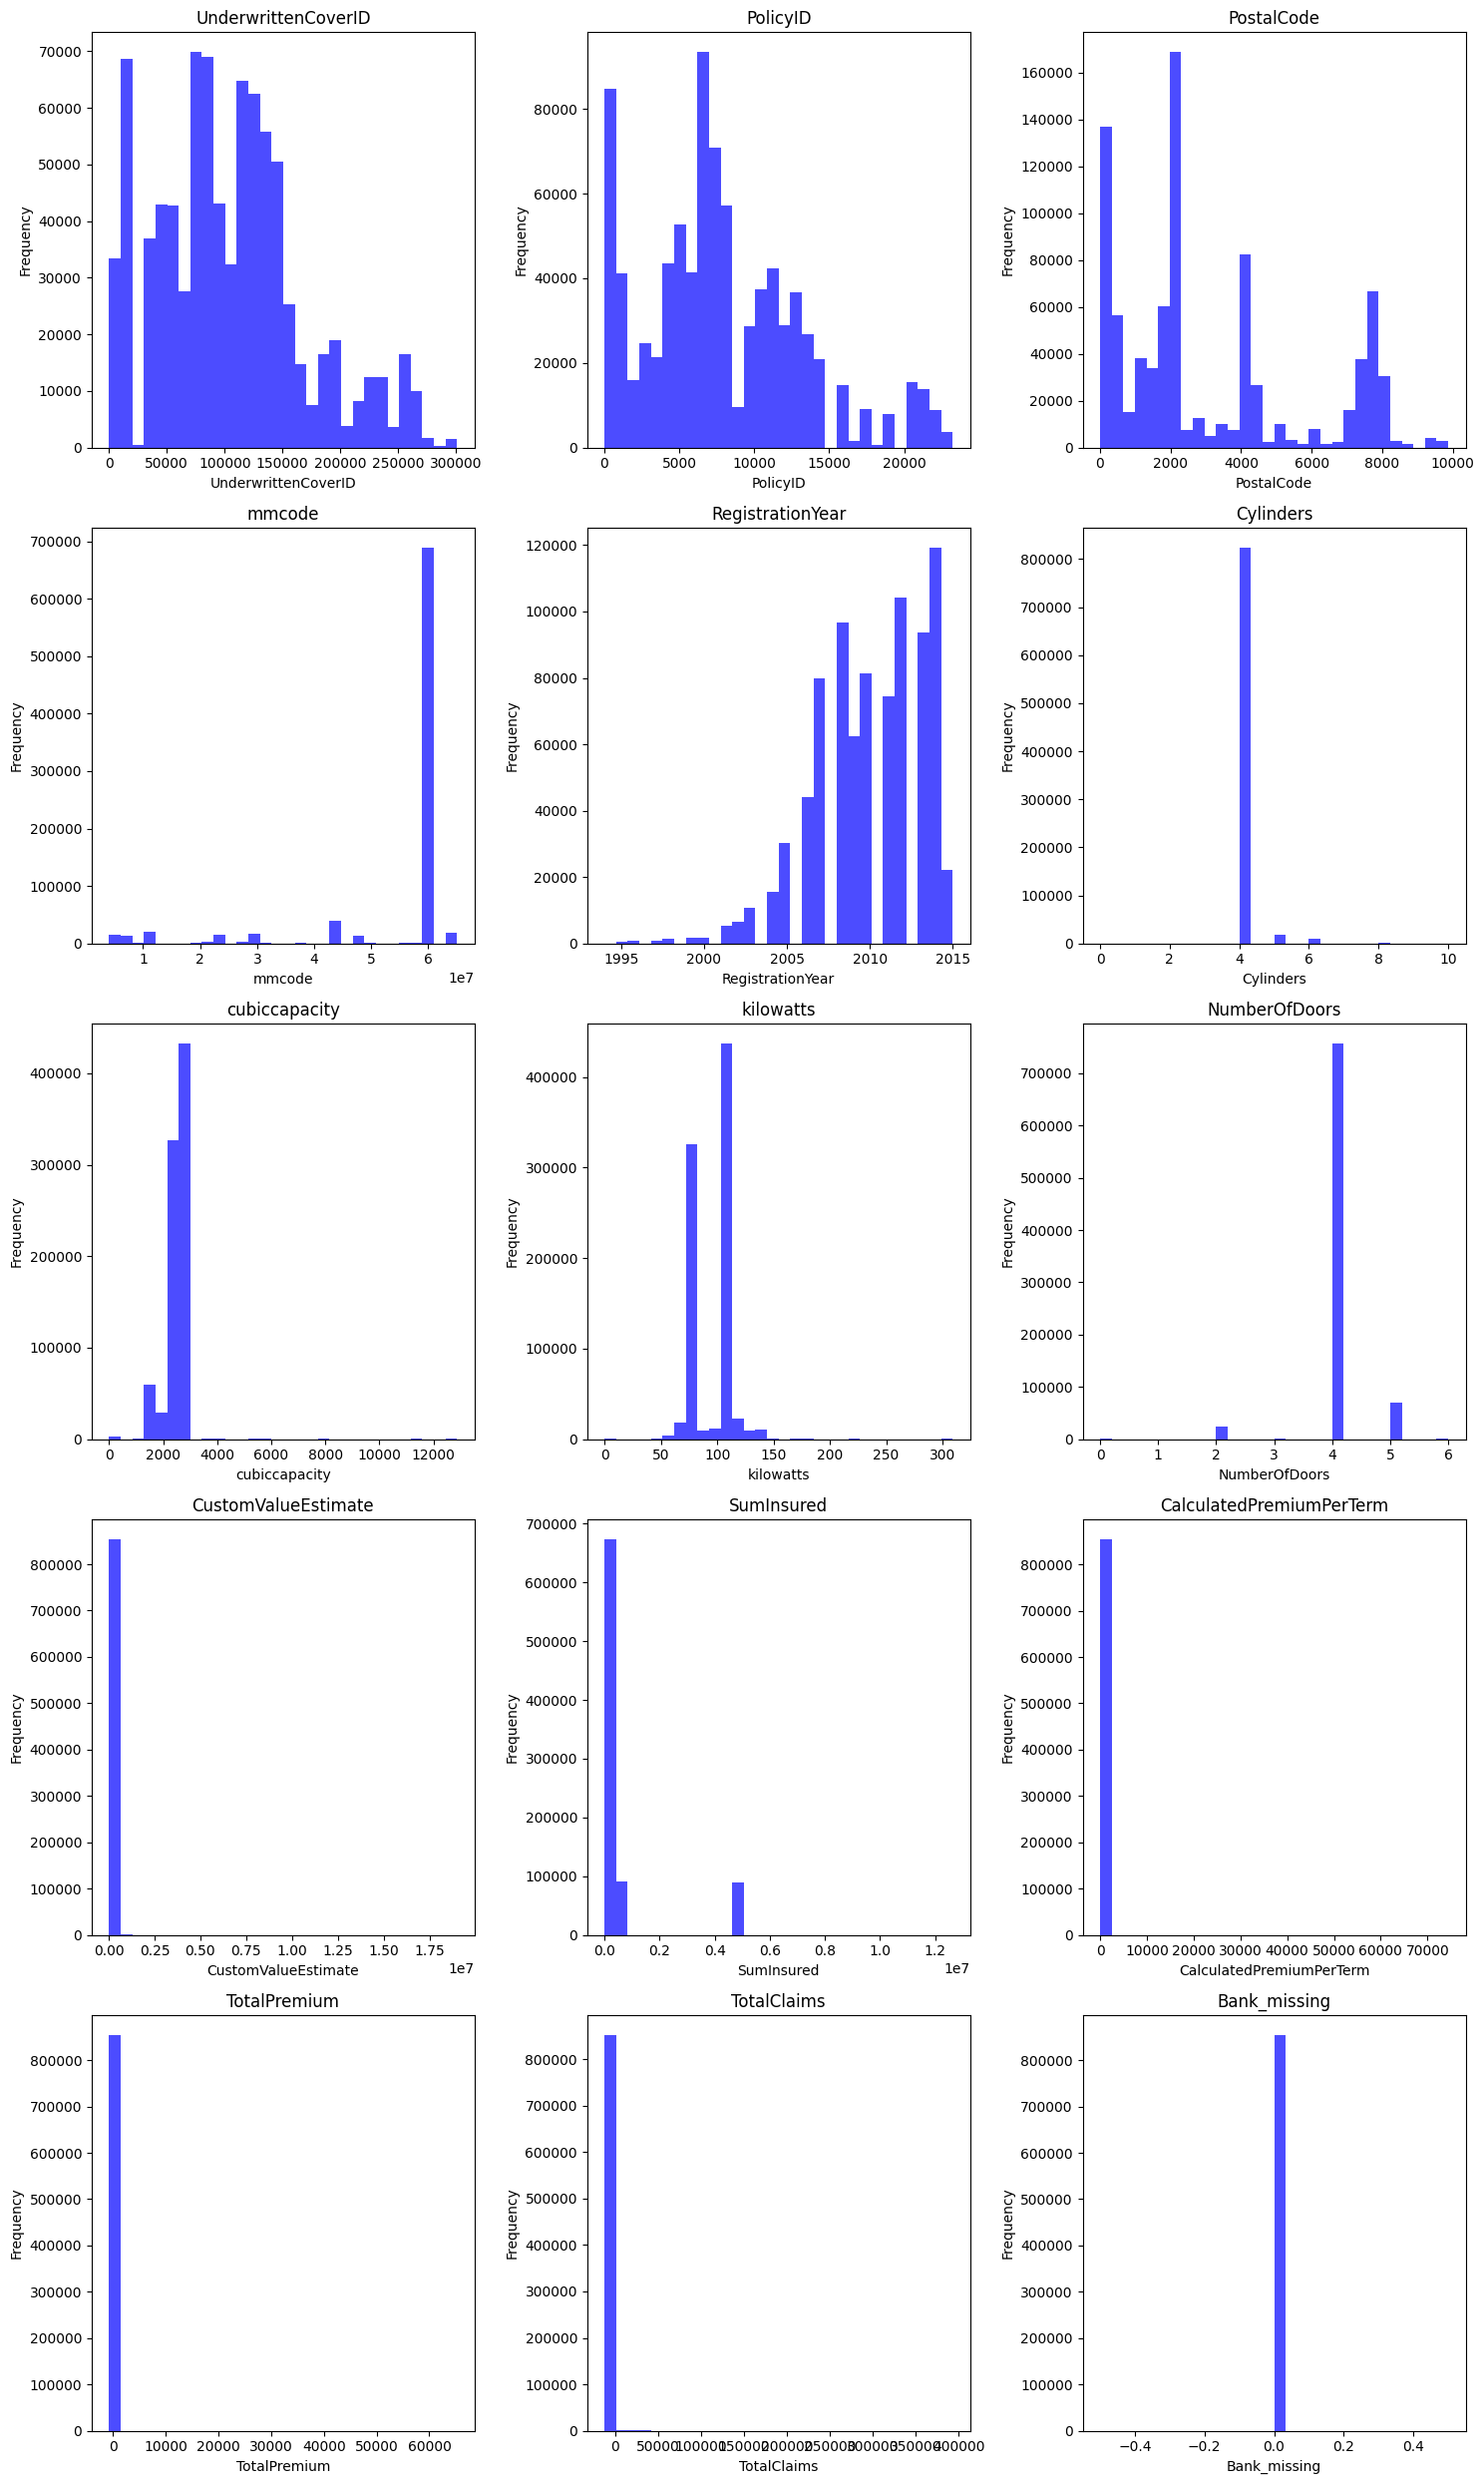

In [23]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot
num_columns = len(numerical_columns)
cols = 3  # Number of columns in the subplot
rows = (num_columns // cols) + (num_columns % cols > 0)  # Calculate number of rows needed

plt.figure(figsize=(15, rows * 5))  # Adjust height based on the number of rows

# Create histograms for each numerical column
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)  # Create subplots based on calculated rows and columns
    plt.hist(df[column].dropna(), bins=30, color='blue', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

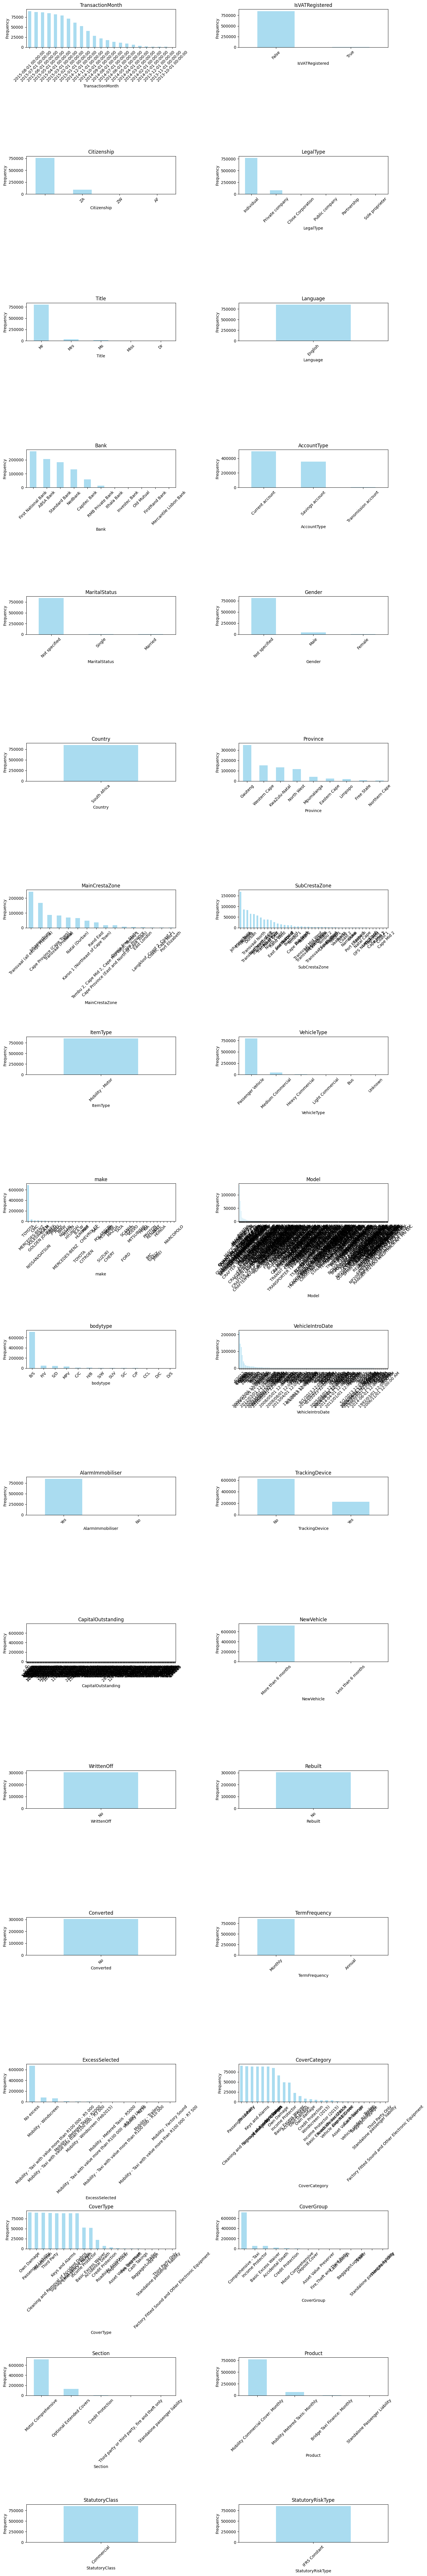

In [26]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Set up the plot
cols = 2  # Number of columns in the subplot
rows = (len(categorical_columns) + cols - 1) // cols  # Calculate number of rows needed
plt.figure(figsize=(15, rows * 5))  # Make the figure taller

# Create bar charts for each categorical column
for i, column in enumerate(categorical_columns):
    plt.subplot(rows, cols, i + 1)  # Create subplots based on calculated rows and columns
    df[column].value_counts().plot(kind='bar', color='skyblue', alpha=0.7)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

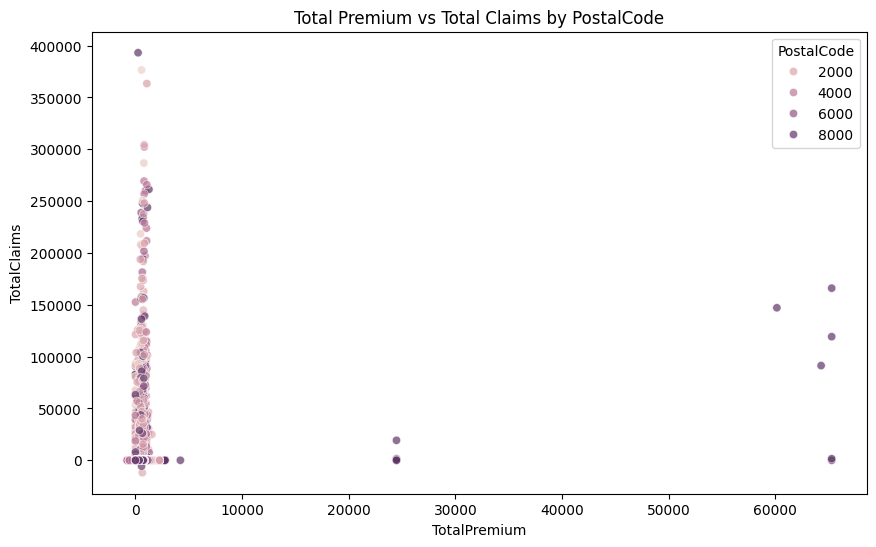

In [27]:
# Scatter plot for TotalPremium vs TotalClaims by ZipCode
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TotalPremium' , y='TotalClaims', hue='PostalCode', alpha=0.7)
plt.title('Total Premium vs Total Claims by PostalCode')
plt.show()

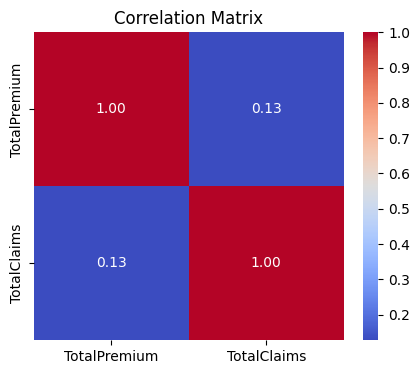

In [31]:

# Correlation matrix
correlation_matrix = df[['TotalPremium', 'TotalClaims']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

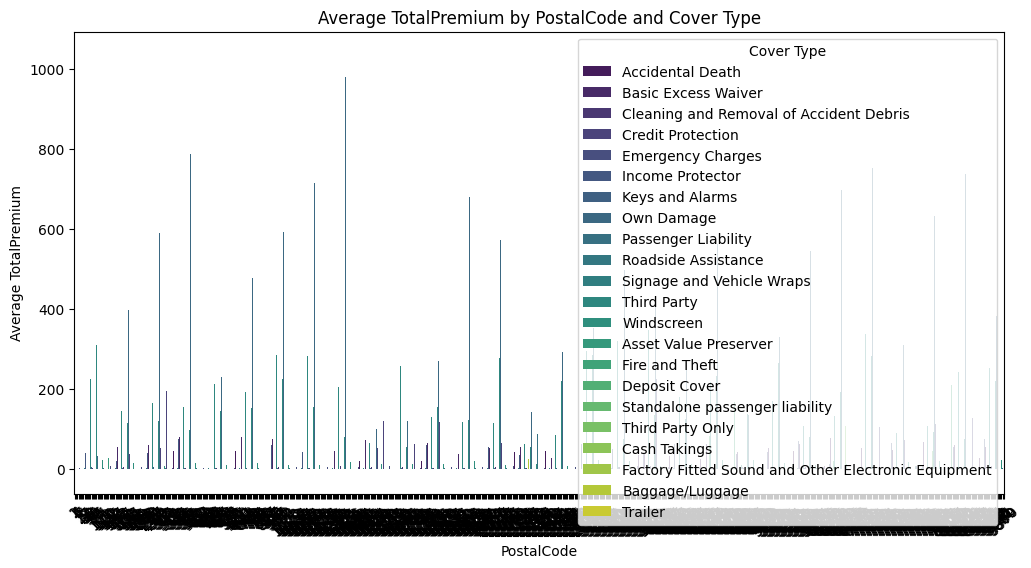

In [35]:
# Group by PostalCode and CoverType, then calculate the mean TotalPremium
geo_comparison = df.groupby(['PostalCode', 'CoverType']).agg({
    'TotalPremium': 'mean'
}).reset_index()

# Bar plot for average TotalPremium by PostalCode with hue for CoverType
plt.figure(figsize=(12, 6))
sns.barplot(data=geo_comparison, x='PostalCode', y='TotalPremium', hue='CoverType', palette='viridis')
plt.title('Average TotalPremium by PostalCode and Cover Type')
plt.xlabel('PostalCode')
plt.ylabel('Average TotalPremium')
plt.xticks(rotation=45)

# Specify a fixed location for the legend
plt.legend(title='Cover Type', loc='upper right')  
plt.show()

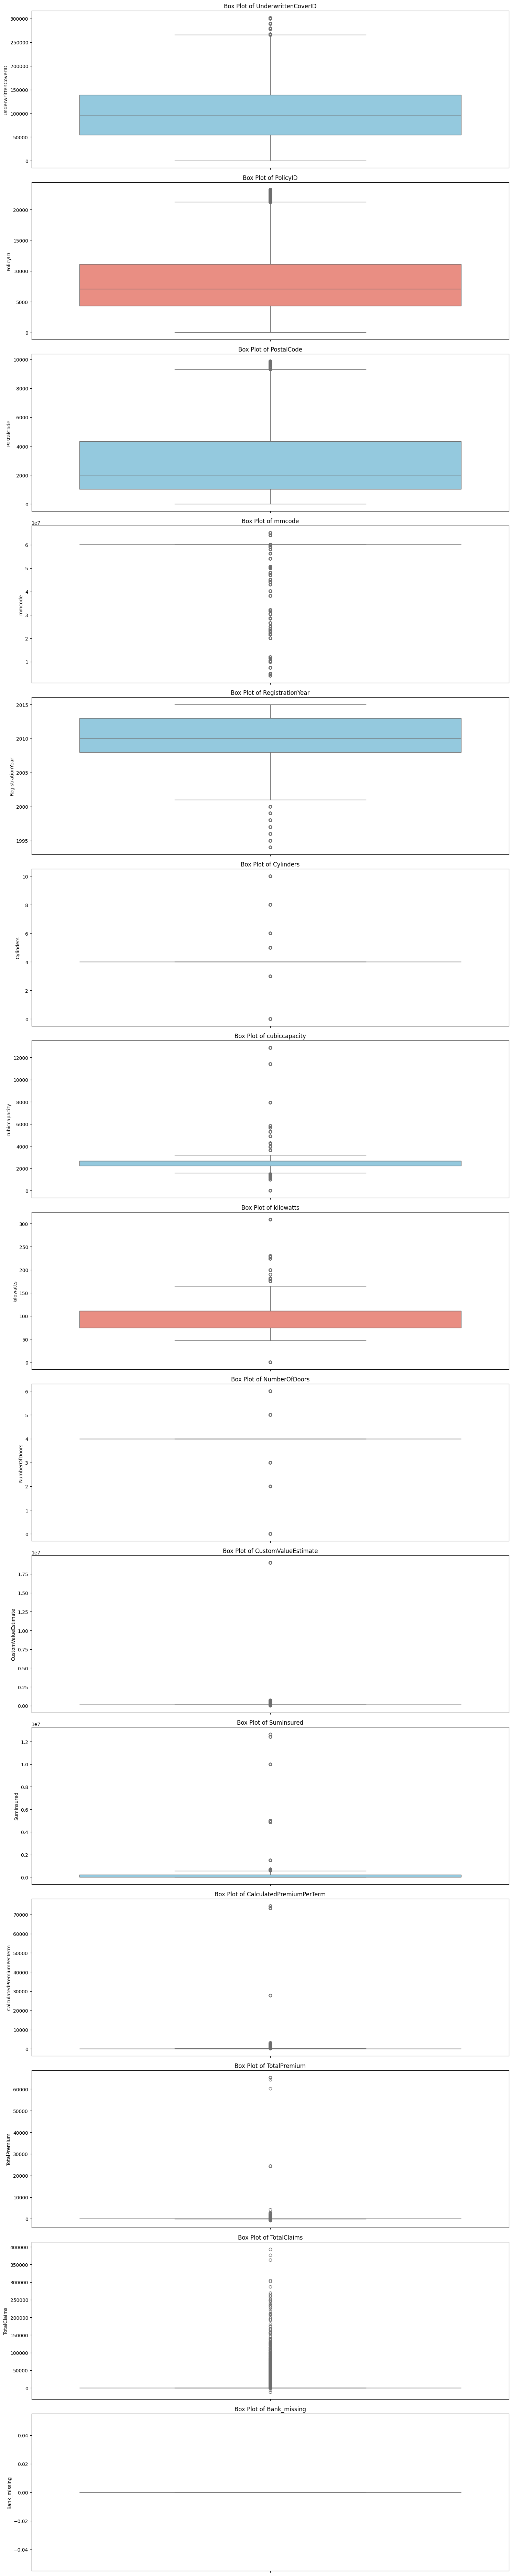

In [37]:
# Identify numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Set up the plot
plt.figure(figsize=(15, len(numerical_columns) * 5))  # Adjust height based on number of numerical columns

# Create box plots for each numerical column
for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns), 1, i + 1)  # Create subplots in a single column
    sns.boxplot(data=df, y=column, color='skyblue' if i % 2 == 0 else 'salmon')  # Alternate colors
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

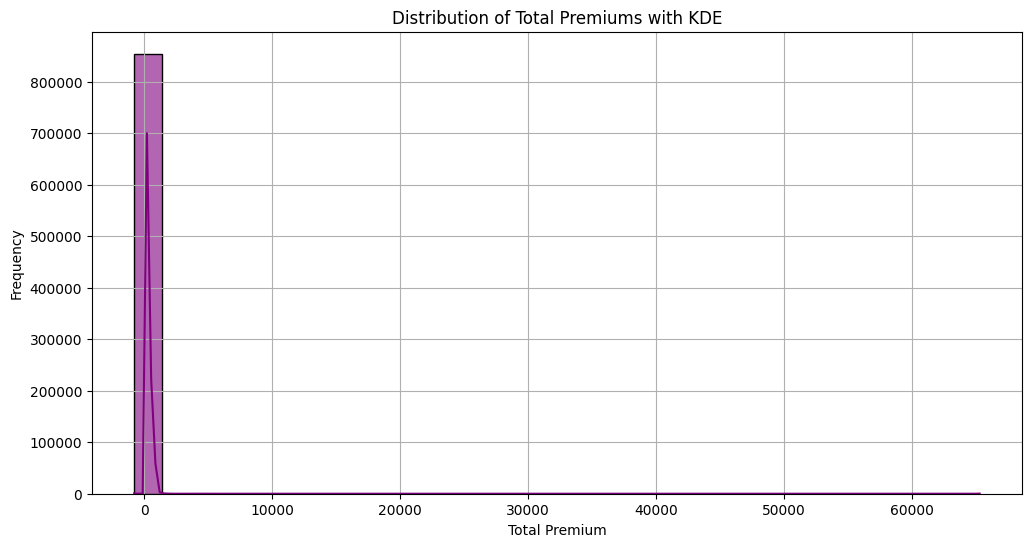

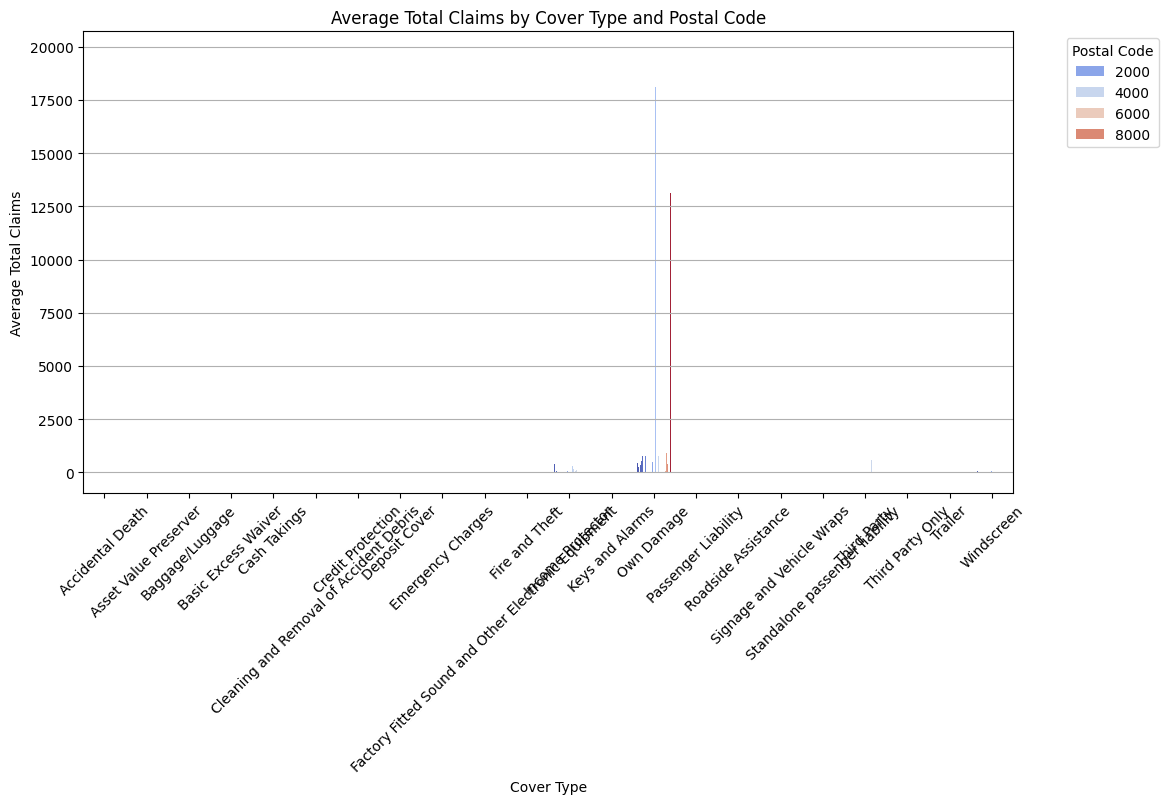

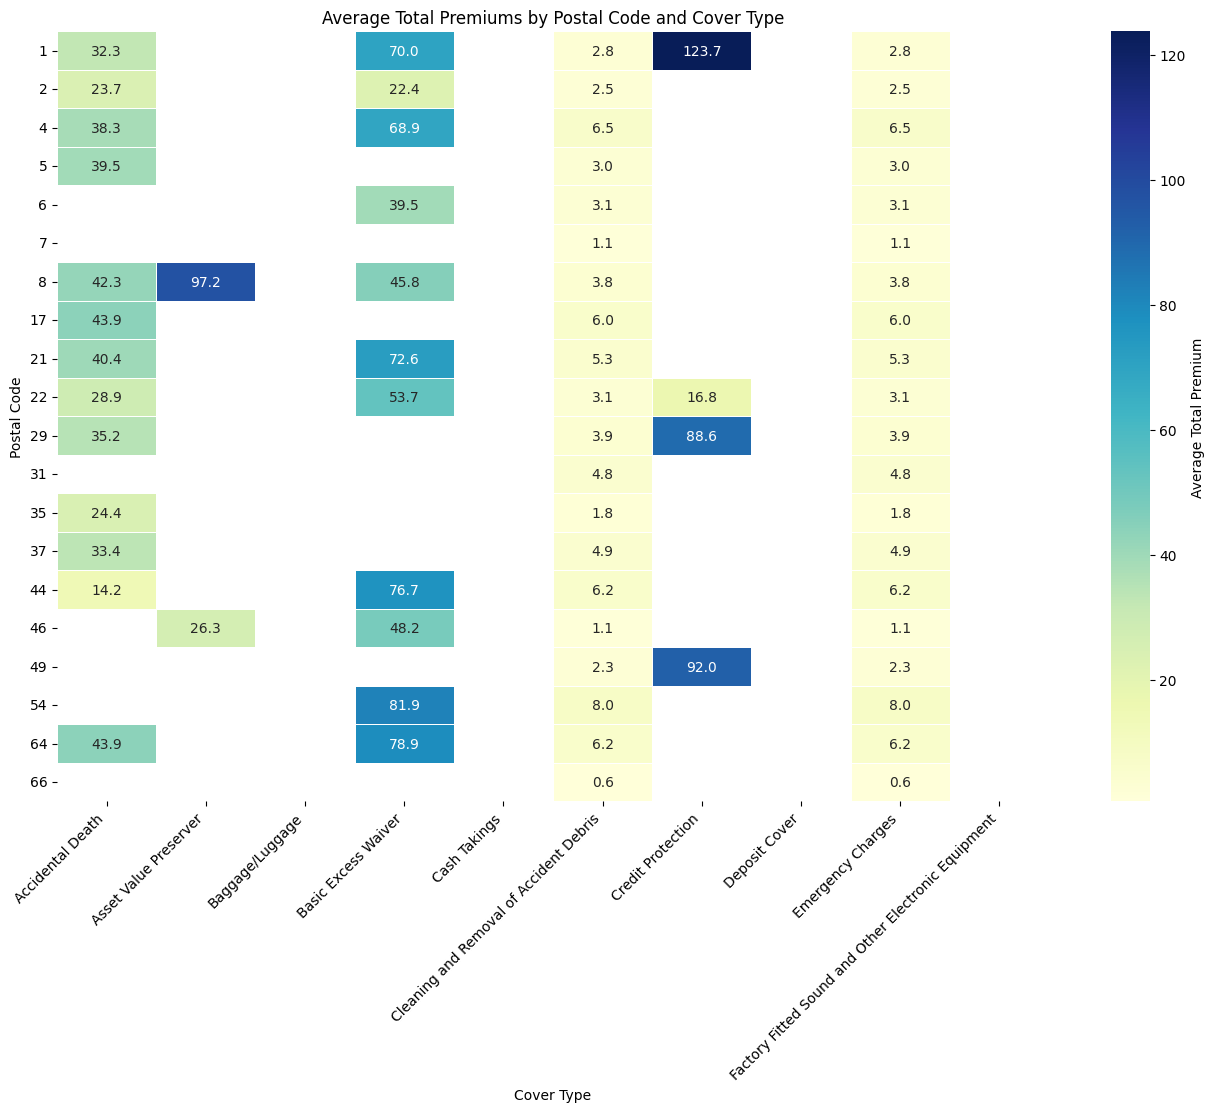

In [42]:
plt.figure(figsize=(12, 6))
sns.histplot(df['TotalPremium'], bins=30, kde=True, color='purple', alpha=0.6)
plt.title('Distribution of Total Premiums with KDE')
plt.xlabel('Total Premium')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Assuming you want to compare average claims by CoverType and PostalCode
claims_by_cover_and_postal = df.groupby(['CoverType', 'PostalCode'])['TotalClaims'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=claims_by_cover_and_postal, x='CoverType', y='TotalClaims', hue='PostalCode', palette='coolwarm')
plt.title('Average Total Claims by Cover Type and Postal Code')
plt.xlabel('Cover Type')
plt.ylabel('Average Total Claims')
plt.xticks(rotation=45)
plt.legend(title='Postal Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.show()
# Pivot table for heatmap (consider filtering or aggregating)
heatmap_data = df.pivot_table(values='TotalPremium', index='PostalCode', columns='CoverType', aggfunc='mean')

# Limit the number of PostalCodes and CoverTypes for better readability
heatmap_data = heatmap_data.loc[heatmap_data.index[:20]]  
heatmap_data = heatmap_data[heatmap_data.columns[:10]]  

plt.figure(figsize=(16, 10))  # Increase figure size
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=.5, cbar_kws={'label': 'Average Total Premium'})
plt.title('Average Total Premiums by Postal Code and Cover Type')
plt.xlabel('Cover Type')
plt.ylabel('Postal Code')
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)  
plt.show()